---
title: Implementing the Perceptron Algorithm
author: Caitlin Baxter
date: '2023-03-25'
description: "Implementing the perceptron alg"
format: html
---

In [15]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Abstract

In this blog post I implemented the perceptron alogorithm to classify linearly seperable data. It was demonstrated through experimentation that the algorithm will terminate with a loss of zero on linearly seperable data, but will never reach a loss of zero and either not terminate, or reach a maximum number of iterations on non-linearly seperable data. The time complexity of the algorithm is dependent on the number of data points and features. 

## Perceptron Implementation

Here is the link to my [perceptron implementation](https://github.com/cbbaxter/cbbaxter.github.io/blob/e99d7d581fbff4126b981da586ed462247a60775/posts/implementing-the-perceptron-alg/perceptron.py).

Here is my implementation of the perceptron.grad() function:

```
def grad(self, X, y):
    score = self.score(X)
    return torch.where((y * score) < 0, y @ X, 0.0)   
```
The gradient function begins by calculating the score of model, using the following formula to calculate the dot product between the vector $w$ and $X_i$

$$s_i = \langle w, X_i\rangle$$

The gradient is then calculated by the following formula:

$${1}\left[s_i y_i < 0 \right] y_i \ x_i$$

In my implementation I used torch.where() to replicate the indicator function (fancy $1$). The first parameter of the torch.where() function checks the condition that the score muliplied by y is greater than zero. If it is, the function returns the dot product of $y$ and $X$, and if not it returns 0. 


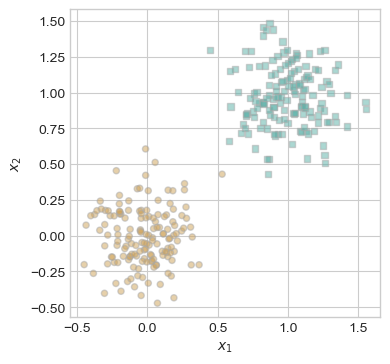

In [16]:
# Generate Data
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2 * y - 1
    y = y.type(torch.FloatTensor)
    return X, y

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

X, y = perceptron_data(n_points = 300, noise = 0.2)

fig, ax = plt.subplots(1, 1, figsize= (4, 4))
plot_perceptron_data(X, y, ax)

This code, by Professor Philip Chodrow, generates linearly seperable data which is neccessary to test my impletation of the perceptron algorithm. The plot shows the data, which we can clearly see is clumped in two different categories that could be seperated by a straight line. 

### Part A

In [17]:
# Check your Implementation 
torch.manual_seed(1234)

p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
max_iter = 1000

while loss > 0 and max_iter > 0:
    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    max_iter = max_iter - 1


In this code block, we use perceptron on the generated linearly seperable data to test its implementation. A while loop runs while the loss value is greater than one, or until the maximum number of iterations is reached. The loss is calculated at the beginning of each iteration. Then, a random data point is selected and a perceptron update is performed using the random data point. A perceptron step once again calculates the loss using the randomly selected data point, then uses Perceptron's grad() function to determine the change to the vector $w$. Once the loss reaches 0 or the maximum number of iterations is reached, the loop will terminate. 

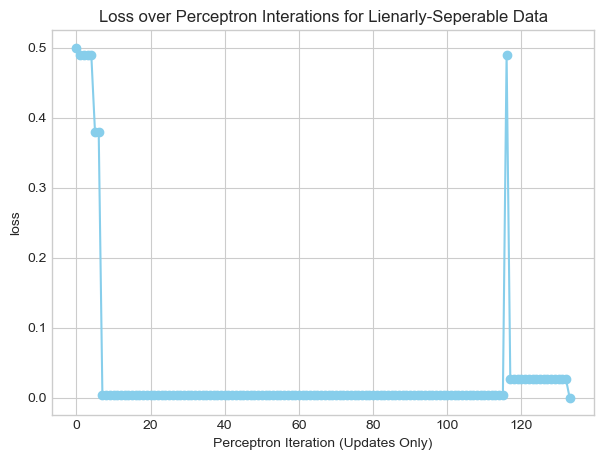

In [18]:
plt.plot(loss_vec, color = "skyblue")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "skyblue")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Loss over Perceptron Interations for Linearly-Seperable Data")

This plot, showing the loss of the function at different iterations demonstrates the efficacy of my implementation of the perceptron algorithm since it terminates after approximately 130 iterations. This means that the algorithm is able to determine a linear boundary that allows for 0 loss before the algorithm reaches 1000 iterations. 

### Part B : Experiments

In [19]:
# Generate Data Functions
# by Prof. Phil Chodrow

def perceptron_data(n_points, noise, p_dims):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2 * y - 1
    y = y.type(torch.FloatTensor)
    return X, y

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")



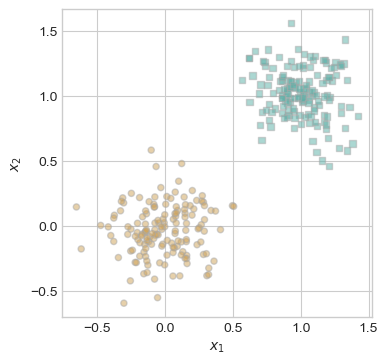

In [20]:
# Generate 2D Linearly Seperable Data

X, y = perceptron_data(n_points = 300, noise = 0.2, p_dims = 2)

fig, ax = plt.subplots(1, 1, figsize= (4, 4))
plot_perceptron_data(X, y, ax)

Similarily to Part A, we can see in this plot a visualization of linearly seperable data. 

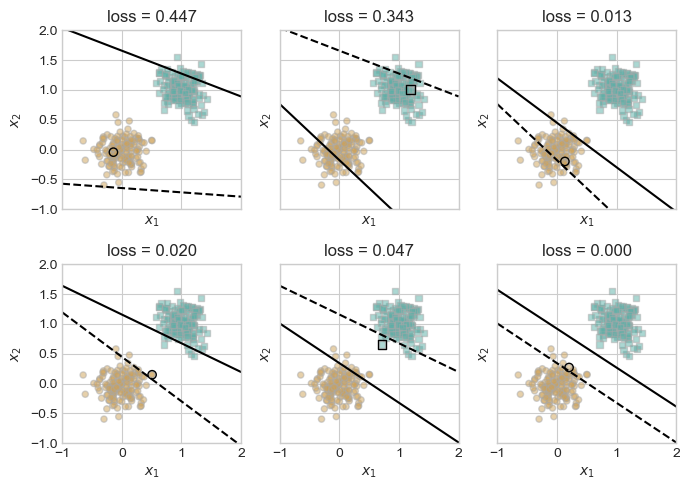

In [21]:
torch.manual_seed(1234)
# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1.0
loss_vec = []

def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

max_iter = 1000
curr_iter = 0

while loss > 0 and curr_iter < max_iter:
    ax = axarr.ravel()[current_ax]
    
    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 
    i = torch.randint(n, size = (1,))

    x_i = X[[i],:]
    y_i = y[i]
    local_loss = opt.step(x_i, y_i)

    
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[y[i].item()]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
    
    curr_iter = curr_iter + 1

plt.tight_layout()

In this plot, we can see the evolution of the loss function during training, and the seperating line when the model reaches a loss of zero. In each panel of the plot, we are able to see the loss, the decision boundary that led to that loss and the previous decision boundary. We can see how the loss changed over the course of the iterations, until finally a loss of zero was reached. If this data were not linearly seperable the function would have terminated before the loss function was zero and the final panel would have have had a loss > 0.0. 

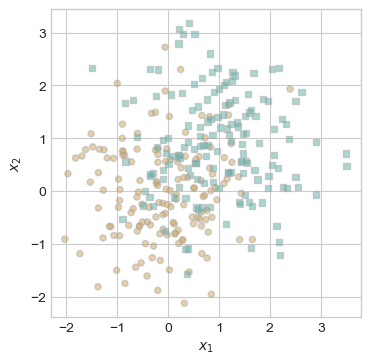

In [22]:
# Generate 2D Non-Linearly Seperable Data
# Code modelled from Prof. Phil Chodrow
torch.manual_seed(1234)

X, y = perceptron_data(n_points = 300, noise = 0.9, p_dims = 2)

fig, ax = plt.subplots(1, 1, figsize= (4, 4))
plot_perceptron_data(X, y, ax)



By increasing the noise of the generated perceptron data, we created data that is not linearly-seperable. As visualized in this plot, the data does not appear to be linearly seperable, as the two points overlap pretty significantly and it is not possible to draw a straight line through the two. When use our perceptron on this data we expect it not to reach a loss of zero.

(-2.0, 4.0)

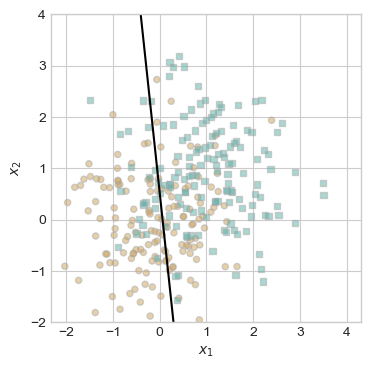

In [23]:
# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# initialize for main loop
current_ax = 0
loss = 1.0
loss_vec = []

def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

max_iter = 1000
curr_iter = 0

final_w = torch.clone(p.w)

while loss > 0 and curr_iter <= max_iter: #and max_iter > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    curr_iter = curr_iter + 1
    if curr_iter == max_iter:
        final_w = torch.clone(p.w)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)
draw_line(final_w, x_min = -2, x_max = 4, ax = ax, color = "black")
ax.set_ylim(-2, 4)




This plot shows the decision boundary of the final iteration. As evidenced in the plot, there and blue and orange points on either side of the boundary, demonstrating that the data is not seperated by the linear line and therefore not linearly seperable. 

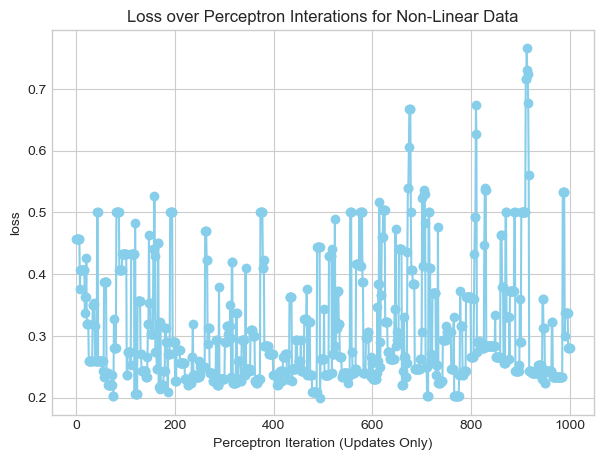

In [24]:
plt.plot(loss_vec, color = "skyblue")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "skyblue")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Loss over Perceptron Interations for Non-Linear Data")

This plot shows the evolution of the loss over training. It does not terminate until it has reached max_iter which makes sense as the data is not linearly seperable. 

In [25]:
# Generate 5 feature Data
# Code modelled from Prof. Phil Chodrow
torch.manual_seed(1234)

X, y = perceptron_data(n_points = 300, noise = 0.2, p_dims = 5)

torch.manual_seed(1234)

p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
max_iter = 1000

while loss > 0: #and max_iter > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    max_iter = max_iter - 1


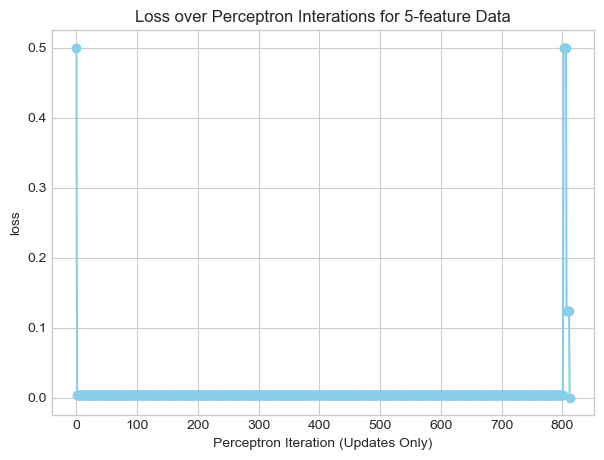

In [26]:
plt.plot(loss_vec, color = "skyblue")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "skyblue")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Loss over Perceptron Interations for 5-feature Data")

The results of this table indicate that the 5-feature data is linearly seperable because the Perceptron terminates after about 800 iterations instead of reaching max_iter. 

## Discussion of Runtime

During a single iteration of the perceptron algorithm, the runtime is $O(n \times p)$, where $n$ is the number of data points and $p$ is the number of features. This is due to the calculation of the score function which requires the multiplication of $X$ and $w$ to be calculated. $X$ is size $n \times p$, as each data point will have $p$ features. Meanwhile $w$ is size $n$.

To compute each row of the resulting matrix, takes $O(n)$ time as it requires $n$ multiplcations and $n-1$ additions. As there are $p$ rows in matrix $X$, the total number of operations requires a time complexity of:  $$O(n \times p)$$.

This means that the runtime complexity of a single iteration depends both on the number of features and data points in $X$. 

## Conclusion
Through this assignment, I was able to learn more about Perceptron and Gradient Descent. Through the experimentation section, I observed that the Perceptron algorithm is only effective when the data is linearly seperable. Its runtime is also dependent on the number of points and number of features in the dataset.